**Dataset link : https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset**

**Gender   Detection Using Convolutional Neural Network
In this notebook let's predict the image is predict male or women. To do this I've used CNN**

****Our age prediction CNN model shall be defined and trained by**:
1. Importing **training and test datasets** from Google Drive Input Sub-folder
2. **Training dataset is already augmented** and has 234,000 images
3. **Greyscaling images** instead of using RGB color images
4. Defining our intuitively **distributed classes of age-ranges**
5. Using **60 epochs** on our **optimized CNN Architecture**, comprising of:
    - an input *Conv2D* layer (with 60 filters) paired with an *AveragePooling2D* layer,
    - a *MaxPooling 2D* layer,
    - 1 *Dense* layer with 132 nodes, and
    - an output *Dense* layer with 7 nodes.**

In [1]:
#import the statndrad librares
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [2]:
#Create the image 
image_shape=[250,250]

#Let's load the train and validation dataset 
train_dataset='../input/gender-classification-dataset/Training'
test_dataset='../input/gender-classification-dataset/Validation'

In [3]:
#traing datagenerator using the parameters
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#create the flow_deretecor with the parameter such as target_size and batch_size along with clas_mode
train_generator=train_datagen.flow_from_directory(train_dataset,target_size=image_shape,batch_size=32,class_mode='binary')

Found 47009 images belonging to 2 classes.


In [4]:
#Add the same parameters to the test dataset
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#create the flow_deretecor with the parameter such as target_size and batch_size along with clas_mode
test_generator=test_datagen.flow_from_directory(test_dataset,target_size=image_shape,batch_size=32,class_mode='binary')

Found 11649 images belonging to 2 classes.


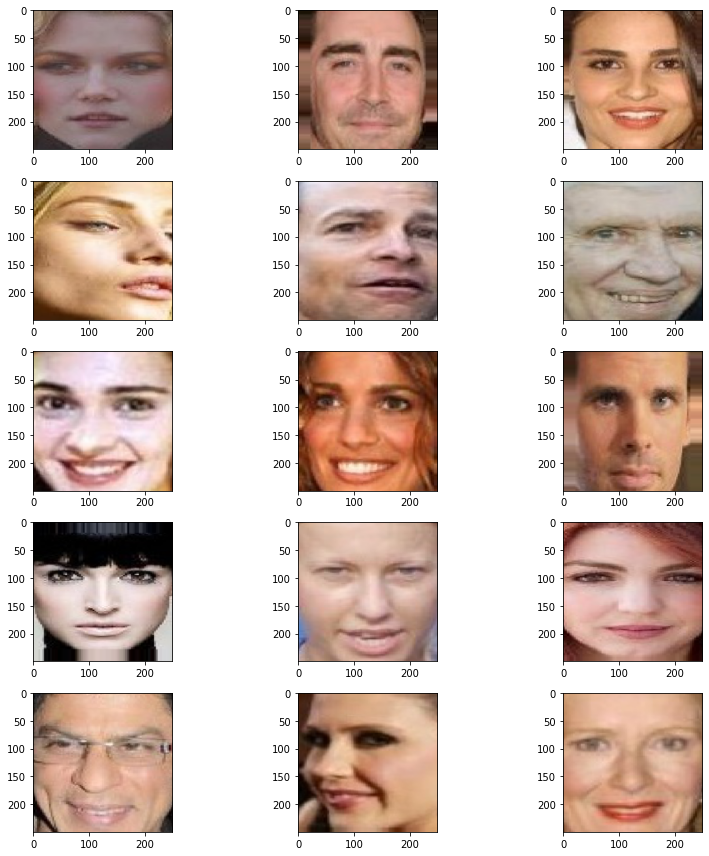

In [5]:
#To visaulize the images in the dataset using the matplotlib
plt.figure(figsize=(12,12))
#Create a for loop for print the images
for i in range(0,15):
    #subplot
    plt.subplot(5,3,i+1)
    #creat a for loop the X and y batch images in the train_data
    for x_batch,y_batch in train_generator:
        #now print the x_bacth
        image=x_batch[0]
        #to visualie the x batch images
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

**Model Buliding**

In [6]:
#Define the model
model=Sequential()
#Add the layers to the model
model.add(Conv2D(60,(3,3),input_shape=(250,250,3)))
#add activation function to the model
model.add(Activation('relu'))
#add the maxpooling layer to the model
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())
#Add the dense layer
model.add(Dense(64))
#add activation
model.add(Activation('relu'))
#add dense layer with output neurors
model.add(Dense(1))
#And finally add sigmoid activation function
model.add(Activation('sigmoid'))
#Finally the model summeray
model.summary()

2022-09-24 07:06:17.178060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 07:06:17.187200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 07:06:17.187941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 07:06:17.188883: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 60)      1680      
_________________________________________________________________
activation (Activation)      (None, 248, 248, 60)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 60)      0         
_________________________________________________________________
flatten (Flatten)            (None, 922560)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                59043904  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

node zero
2022-09-24 07:06:17.189958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 07:06:17.190638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 07:06:17.888415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 07:06:17.889472: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 07:06:17.890490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

**Compile the model with the parameters**

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 60)      1680      
_________________________________________________________________
activation (Activation)      (None, 248, 248, 60)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 60)      0         
_________________________________________________________________
flatten (Flatten)            (None, 922560)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                59043904  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

**Fitting the model with train and test dataset**

In [8]:
#Let's fit the model 
traing=model.fit(train_generator,
                validation_data=test_generator,epochs=5)

2022-09-24 07:06:19.064199: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-09-24 07:06:20.488045: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1470/1470 [==============================] - 790s 536ms/step - loss: 0.6823 - accuracy: 0.8206 - val_loss: 0.3364 - val_accuracy: 0.8476
Epoch 2/5
1470/1470 [==============================] - 818s 557ms/step - loss: 0.2797 - accuracy: 0.8920 - val_loss: 0.2854 - val_accuracy: 0.8897
Epoch 3/5
1470/1470 [==============================] - 828s 563ms/step - loss: 0.2477 - accuracy: 0.9040 - val_loss: 0.2236 - val_accuracy: 0.9155
Epoch 4/5
1470/1470 [==============================] - 806s 549ms/step - loss: 0.2358 - accuracy: 0.9110 - val_loss: 0.3055 - val_accuracy: 0.8727
Epoch 5/5
1470/1470 [==============================] - 827s 562ms/step - loss: 0.2236 - accuracy: 0.9167 - val_loss: 0.2111 - val_accuracy: 0.9178


**Checking the image **

In [19]:
#Ceck the images 
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing import image
import numpy as np
img_pred=image.load_img("../input/gender-classification-dataset/Validation/female/112956.jpg.jpg",target_size=(250,250))
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result)
prediction=" "
if result[0][0]==1:
    prediction="men"
else:
    prediction="women"

[[0.]]


In [21]:
print("prediction:",prediction)

prediction: women


****To visualize the loss and val_loss function to the using the matplotlib****

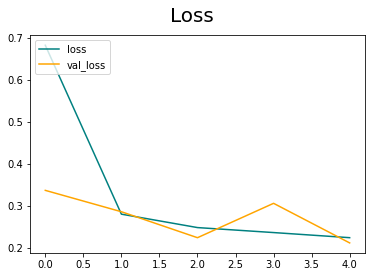

In [47]:
fig = plt.figure()
plt.plot(traing.history['loss'], color='teal', label='loss')
plt.plot(traing.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

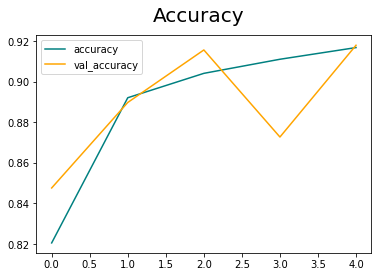

In [48]:
fig = plt.figure()
plt.plot(traing.history['accuracy'], color='teal', label='accuracy')
plt.plot(traing.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


**Test the model to predict the good result**

In [53]:
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing import image
#Create a function the model is predict the input images with good accuracy 
def predictImage(filename):
    #create a varibale and load_image with target_size
    img1 = image.load_img(filename,target_size=(250,250))
    #Let's visualize it using the matplotlib
    plt.imshow(img1)
    #Create y variable to covert the image into arrys
    Y = image.img_to_array(img1)
    
    #Expand the shape of an array.

    #Insert a new axis that will appear at the axis position in the expanded array shape.
    X = np.expand_dims(Y,axis=0)
    #Predict the the test dataset
    val = model.predict(X)
    print(val)
    #create condition to for predict the labels
    if val == 1:
        plt.xlabel("Men",fontsize=30)
    elif val == 0:
        plt.xlabel("Women",fontsize=30)


[[4.43002e-21]]


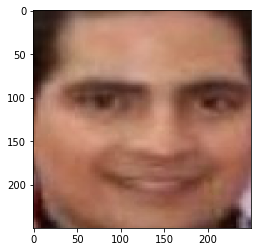

In [54]:
predictImage('../input/gender-classification-dataset/Validation/male/063443.jpg.jpg')

[[1.]]


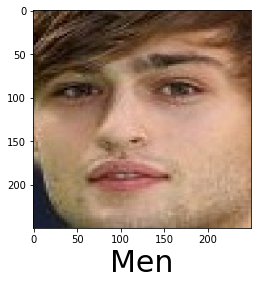

In [55]:
predictImage('../input/gender-classification-dataset/Validation/male/063503.jpg.jpg')

[[1.]]


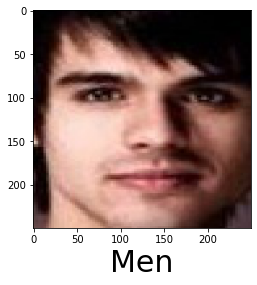

In [56]:
predictImage('../input/gender-classification-dataset/Validation/male/063531.jpg.jpg')

[[0.]]


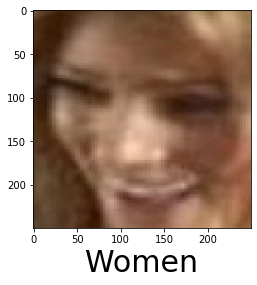

In [57]:
predictImage('../input/gender-classification-dataset/Validation/female/112968.jpg.jpg')

[[0.]]


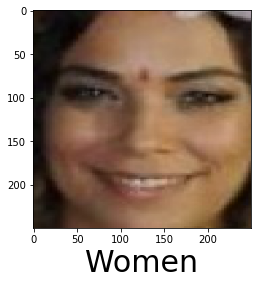

In [58]:
predictImage('../input/gender-classification-dataset/Validation/female/112973.jpg.jpg')

[[0.]]


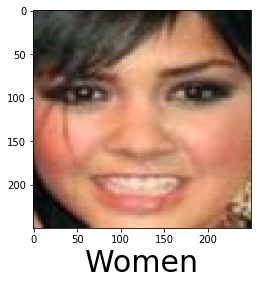

In [59]:
predictImage('../input/gender-classification-dataset/Validation/female/113033.jpg.jpg')

[[0.]]


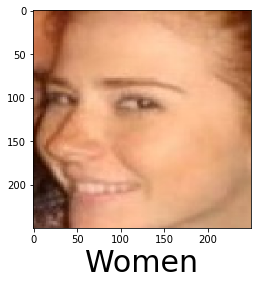

In [60]:
predictImage('../input/gender-classification-dataset/Validation/female/113025.jpg.jpg')

***Conculsion
The dataset is takenfrom the kagele soure, this is a calssification problem to predict the image is men or women. Firstly we resacale the image with imagedatagenerator after that we load the data with some parameter such as target_size,batch_size etc.Then we install the sequential model in the model we conv2d,maxpooling2d,faltten layer,and finally add dense layer after that we complile the model and then fit the model with 10 epochs, we get arround 91% accuracy score to the model, then create a function to predict the image is men or non women, our model is predict the good result of the inputimages.***